## TASK - 2 BHARAT INTERN

### WINE QUALITY PREDICTION

##### By: Anchal Kapoor

### Problem Statement

### About Red Wine Dataset

The dataset is pertaining to variations of Portuguese "Vinho Verde" wine. The source of additional information is the reference [Cortez et al., 2009].

The Dataset contain total 12 columns whose discription is as below:
1. **fixed acidity:** The majority of acids found in wine are classified as fixed or nonvolatile, indicating that they don't evaporate easily. These acids play a significant role in shaping the wine's overall taste, mouthfeel, and balance. 

2. **volatile acidity:** Excessive levels of acetic acid in wine can result in an undesirable vinegar-like taste. The presence of acetic acid, when exceeding appropriate levels, negatively impacts the wine's flavor profile, leading to an unpleasant sensory experience reminiscent of vinegar. Proper control and monitoring of acetic acid content are crucial in winemaking to avoid compromising the overall quality and taste of the final product.

3. **citric acid:** When present in minor amounts, citric acid can impart a sense of 'freshness' and enhance the flavor profile of wines. In small quantities, citric acid contributes to the wine's taste by adding a refreshing element.

4. **residual sugar:** Residual Sugar refers to the sugar left in wine after fermentation cessation, and it's uncommon to come across wines with less than 1 gram per liter of residual sugar.

5. **chlorides:** Chlorides in wine refer to the quantity of salt present in the beverage. This parameter helps measure the salt content in the wine, which can have an impact on its overall taste and flavor profile.

6. **free sulphur dioxide:** Free sulfur dioxide in wine exists in a balance between molecular SO2 (as a dissolved gas) and bisulfite ion. This equilibrium helps prevent various wine-related issues and oxidation. The presence of free SO2 acts as a preservative, protecting the wine from spoilage and maintaining its freshness. 

7. **total sulfur dioxide:** in wine represents the combined quantity of both free and bound forms of SO2. In low concentrations, SO2 is usually not detectable in wine, but it becomes apparent when present in its free form. This compound serves as a preservative, safeguarding the wine from spoilage and oxidation.

8. **density:** The density of wine is closely related to that of water and varies depending on the percentage of alcohol and sugar content. The specific gravity or density measurement can provide valuable information about the wine's composition and its alcohol and sugar levels. 

9. **ph:** The pH of wine indicates its level of acidity or basicity on a scale ranging from 0 (very acidic) to 14 (very basic). Typically, most wines fall within the pH range of 3 to 4. This measurement allows winemakers to understand and control the wine's acidity, which is crucial in determining its overall taste, stability, and how well it pairs with different foods.

10. **sulphates:** Sulphates are wine additives that can increase the levels of sulfur dioxide gas (SO2), which acts as an antimicrobial agent and preservative. By adding sulfates to wine, winemakers enhance its ability to ward off unwanted microbial growth and oxidation, thus improving its shelf life and overall stability.

11. **alcohol:**  Alcohol is a key component in wine, formed through the fermentation process when yeast converts sugar into ethanol and carbon dioxide. It plays a crucial role in defining a wine's character, affecting its body, aroma, and overall flavor profile. 

12. **quality:** The quality columns tells us how is the red wine quality depending on the concenterations of all other features/columns that are explained above.

In this notebook we predict the quality of red wine based on other features/columns.


### Importing the libraries.....

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset...

In [2]:
df= pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis

In [3]:
# Description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# To check the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# dataset shape
df.shape

(1599, 12)

In [7]:
# To check the duplicate values in the dataset
df.duplicated().sum()

240

In [8]:
# Remove the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [9]:
# check the shape of dataset after removing duplicates
df.shape

(1359, 12)

In [10]:
# Correlation -- tells us the relationship between two variables( here - sign  indicate the negative correlation and + sign indicate the positive correlation)
corr_matrix=df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


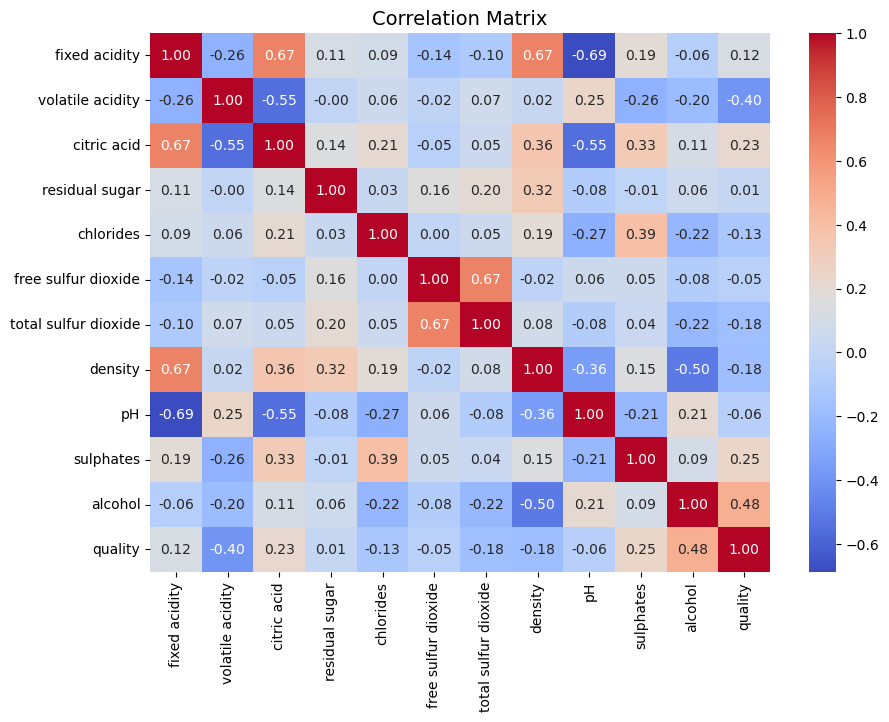

In [11]:
# Lets make the correlation matrix for easy visualisation 
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix", fontsize=14)
plt.show()

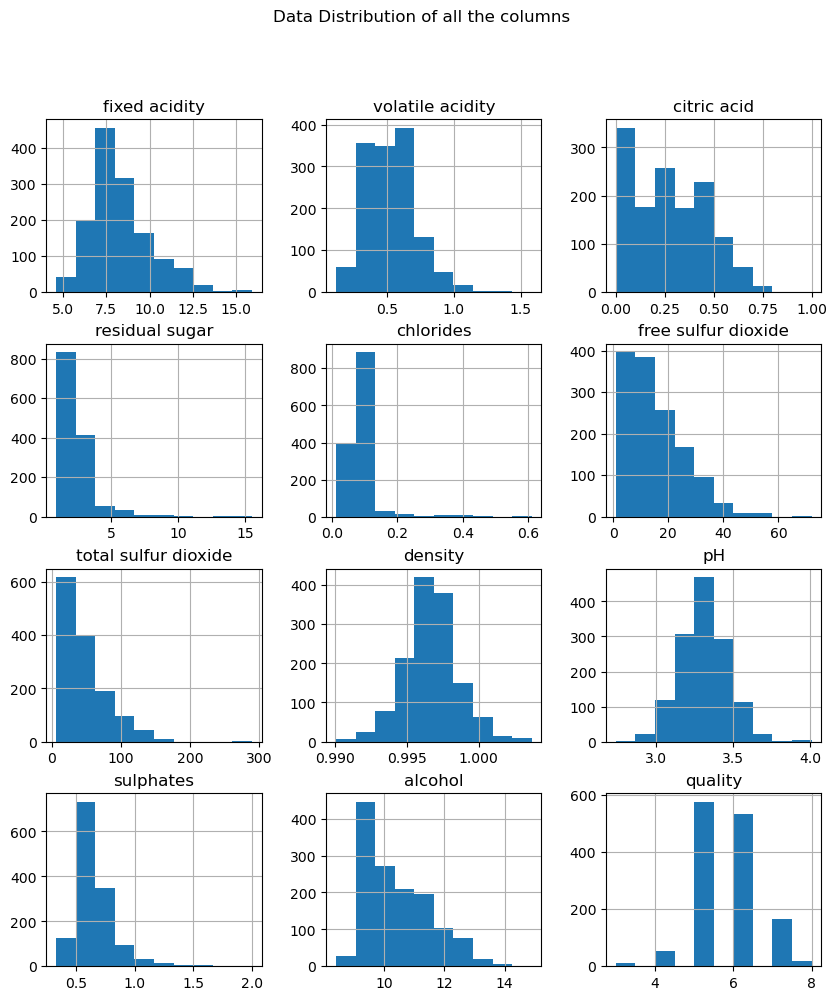

In [12]:
# Lets make the histogram containing all the columns
df.hist(bins=10, figsize=(10,11))
plt.suptitle("Data Distribution of all the columns")
plt.show()

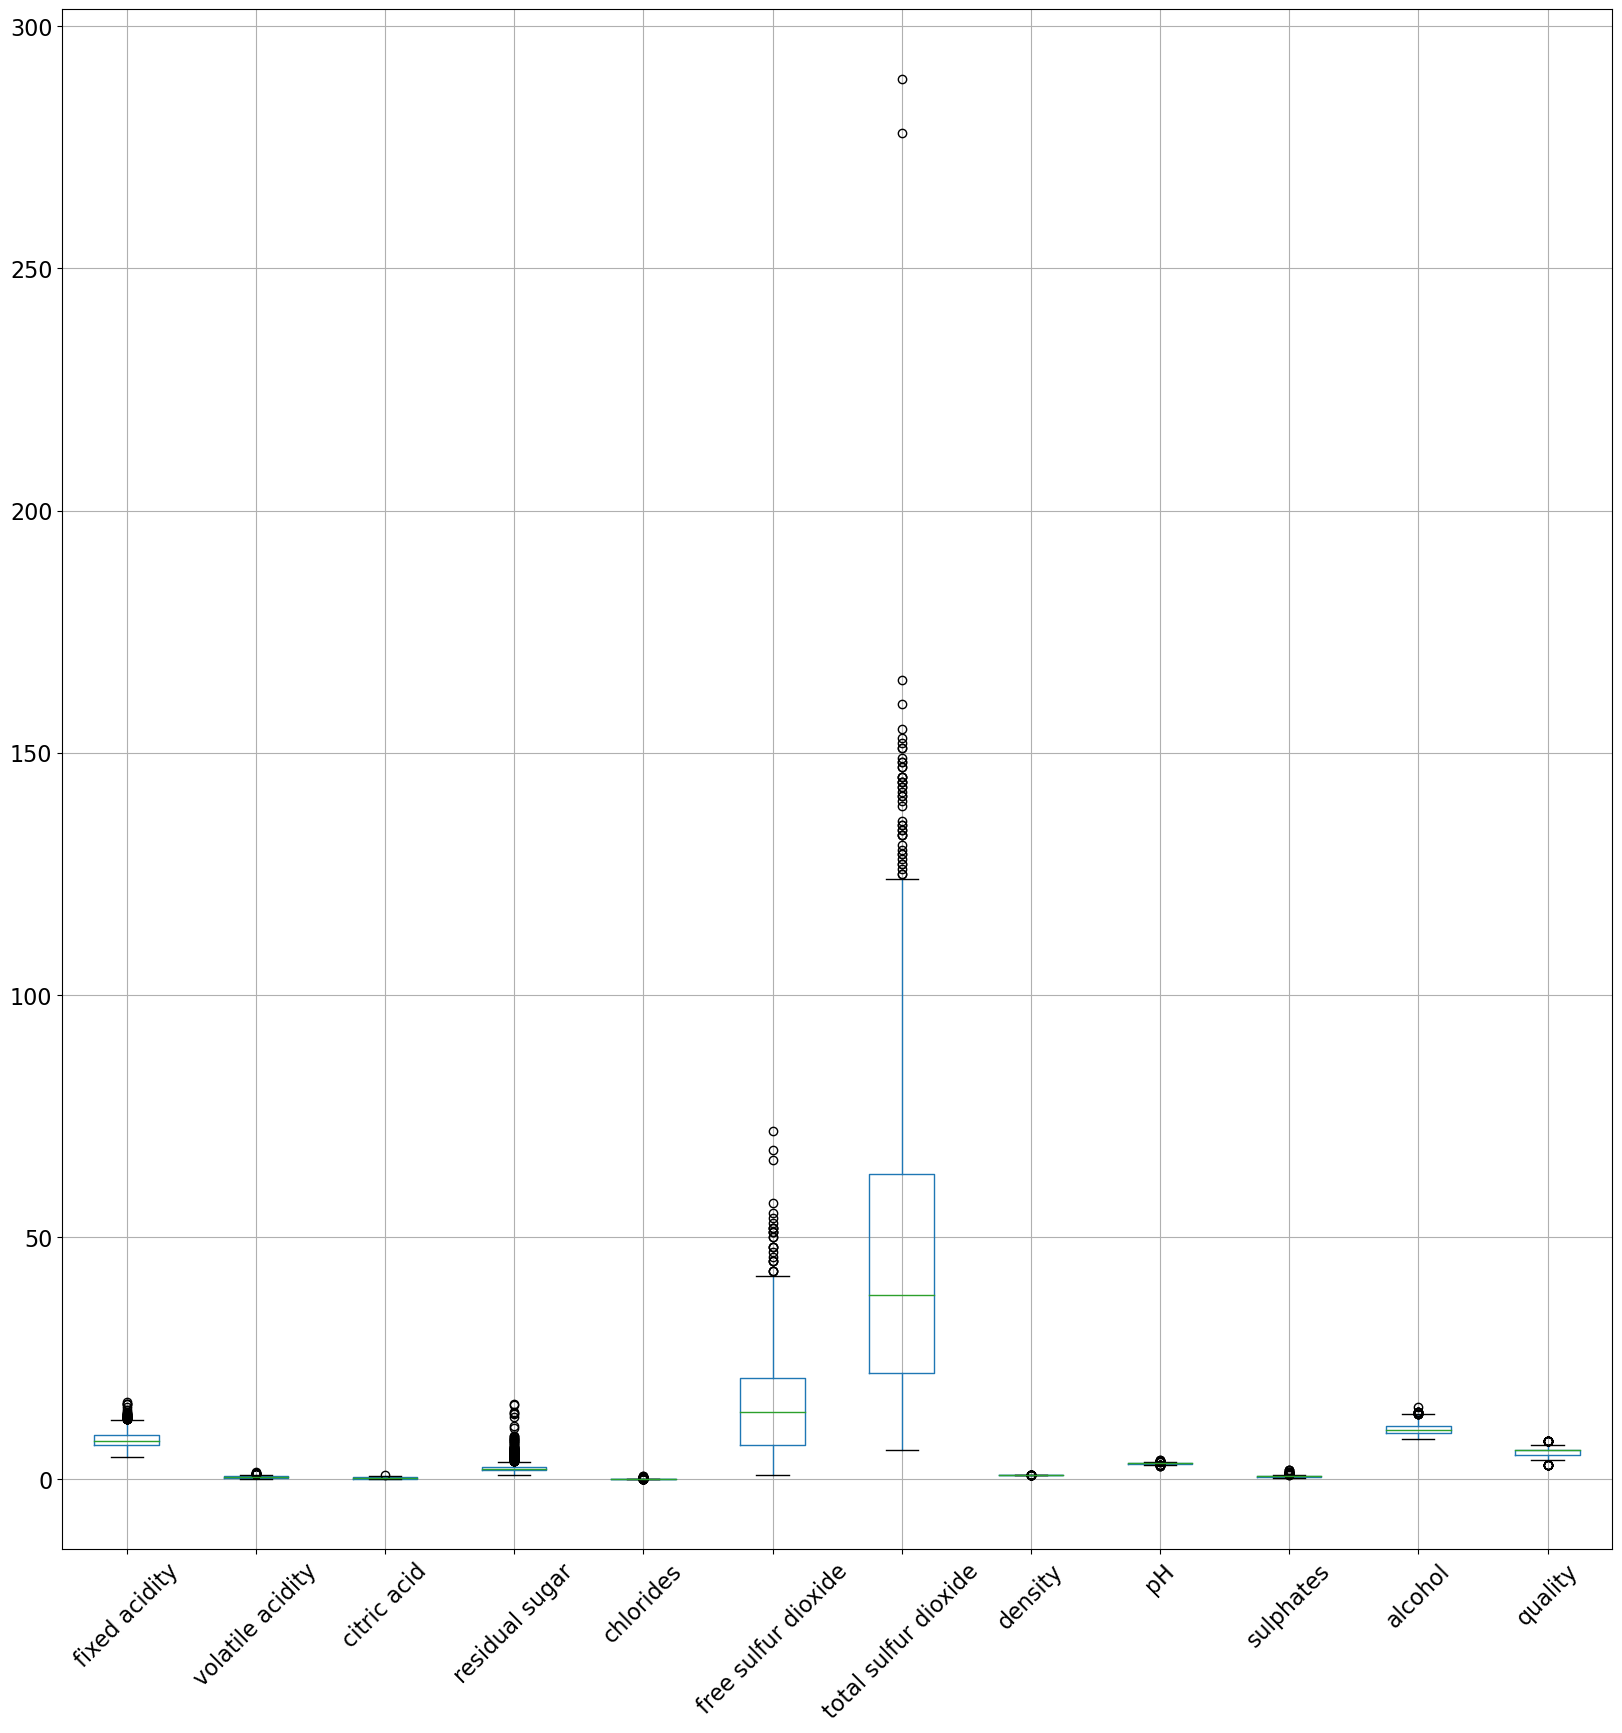

In [13]:
# let's visulause the percentile and median base distribution (Boxplot helps us to see the outliers in the dataset)
df.boxplot(column=df.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)
plt.show()

### Detecting Outliers from Dataset

In [14]:
# Detecting outliers in daatset
columns=df.columns.tolist()
outliers=[]

for col in columns:
    q1=np.percentile(df[col], 1)
    q3=np.percentile(df[col],99)
    
    print("col", col)
    
    for pos in range(len(df)):
        if df[col].iloc[pos] > q3 or df[col].iloc[pos]< q1:
            outliers.append(pos)
            
    print(outliers)

col fixed acidity
[41, 86, 87, 214, 255, 285, 302, 308, 328, 334, 385, 444, 473, 482, 483, 485, 510, 565, 588, 602, 693, 710, 948, 987, 1046, 1082, 1125]
col volatile acidity
[41, 86, 87, 214, 255, 285, 302, 308, 328, 334, 385, 444, 473, 482, 483, 485, 510, 565, 588, 602, 693, 710, 948, 987, 1046, 1082, 1125, 35, 109, 114, 115, 121, 176, 237, 262, 482, 582, 597, 610, 627, 810, 866, 925, 963, 986, 1048, 1096, 1106, 1117, 1211, 1244, 1279, 1329]
col citric acid
[41, 86, 87, 214, 255, 285, 302, 308, 328, 334, 385, 444, 473, 482, 483, 485, 510, 565, 588, 602, 693, 710, 948, 987, 1046, 1082, 1125, 35, 109, 114, 115, 121, 176, 237, 262, 482, 582, 597, 610, 627, 810, 866, 925, 963, 986, 1048, 1096, 1106, 1117, 1211, 1244, 1279, 1329, 135, 182, 226, 308, 329, 345, 381, 383, 385, 437, 444, 468, 473, 1336]
col residual sugar
[41, 86, 87, 214, 255, 285, 302, 308, 328, 334, 385, 444, 473, 482, 483, 485, 510, 565, 588, 602, 693, 710, 948, 987, 1046, 1082, 1125, 35, 109, 114, 115, 121, 176, 237, 262

In [15]:
# Removing the duplicte values from outliers list
outliers_set= set(outliers)
final_outliers=list(outliers_set)

In [16]:
# Ratio (tell us the percentage of outliers find in the dataset)
ratio_outliers=len(final_outliers)/len(df)
ratio_outliers*100

13.392200147167035

In [17]:
# Drop the outliers from our dataset
df.drop(df.index[final_outliers], inplace=True)

In [18]:
# length of dataset after removing outliers 
len(df)

1177

### Split the dataset into train and  test set

In [19]:
# Split the data into train and test split and we use 20 percent data for testing
x_train,x_test,y_train,y_test= train_test_split(df.drop("quality", axis=1),
                                                df["quality"],
                                                test_size=0.2,
                                                random_state=42)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((941, 11), (236, 11), (941,), (236,))

### Data Preprocessing step

In [20]:
# Data Preprocessing (--normalise the values of dataset)
std= StandardScaler()
x_train= std.fit_transform(x_train)  
x_test=std.transform(x_test)

### Creating  Regression Models 

In [21]:
# Defining Models
models=[
        LinearRegression(),
        RandomForestRegressor(),
        DecisionTreeRegressor(),
        GradientBoostingRegressor(),
        SVR(),
        Lasso(),
        Ridge(),
        ElasticNet()
        
       
]

In [22]:
# Defining parameters
Linear_param={'n_jobs':[-1]}
              

Random_param={'n_estimators':[100,200],
              'max_depth':[6,8],
              'min_samples_split':[2,4], 
              'criterion':['squared_error'],
                                       }
                      
                                       
Decsion_param={'splitter':['best'], 
               'max_depth':[8,10], 
               'min_samples_split':[2],
               'criterion':['squared_error'], 
                                        
              }           
                                       
gradient_param={'n_estimators':[100,200], 
                   'learning_rate':[0.1, 0.01,0.001],
                   'max_depth':[8,10],
                   'min_samples_leaf':[2,4,5],
                   'loss':['squared_error'],
                    }
                   
        
        
SVR_param={'kernel':['rbf','poly'], 
      'gamma':['scale', 'auto'],
    }
          
Lasso_param={'alpha':[1.0,1.1],
             'max_iter':[1000,1200],
             'selection':['cyclic', 'random']
}

Ridge_param={ 'alpha':[1.0,1.1],
             'max_iter':[1000,1200],
             'solver':['auto','svd','lsqr']
    
}

ElasticNet_param={'alpha':[1.0,1.1],
                 'max_iter':[1000,1400],
                 'selection':['cyclic', 'random']
    
}

parameters=[ 
            Linear_param,
            Random_param,
            Decsion_param,
            gradient_param,
            SVR_param,
            Lasso_param,
            Ridge_param,
            ElasticNet_param
            ]
                            

### Apply GridSearchCV 

In [23]:
# Train the models using GridSearchCV
result={}
    
for i in range(len(models)):
    temp = []
    regressor = GridSearchCV(models[i], parameters[i], cv=2, scoring="r2", n_jobs=-1).fit(x_train, y_train)    # fitting the object
    models[i] = models[i].__class__.__name__
    best_parameters = regressor.best_params_
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    temp.append(mse)
    result[f"{models[i]}"] = temp  


###### Display the results of all models in a dictionary

In [24]:
result

{'LinearRegression': [0.419276429868166],
 'RandomForestRegressor': [0.40555865909656297],
 'DecisionTreeRegressor': [0.6138237294930033],
 'GradientBoostingRegressor': [0.42816615433079486],
 'SVR': [0.4260959467044473],
 'Lasso': [0.6303383152150248],
 'Ridge': [0.41927815570093097],
 'ElasticNet': [0.6303383152150248]}

###### Create a Dataframe for results 

In [25]:
final_results= pd.DataFrame(result)
final_results=final_results.T
final_results.columns = ["MeanSquaredError"]
final_results

,MeanSquaredError
LinearRegression,0.419276
RandomForestRegressor,0.405559
DecisionTreeRegressor,0.613824
GradientBoostingRegressor,0.428166
SVR,0.426096
Lasso,0.630338
Ridge,0.419278
ElasticNet,0.630338


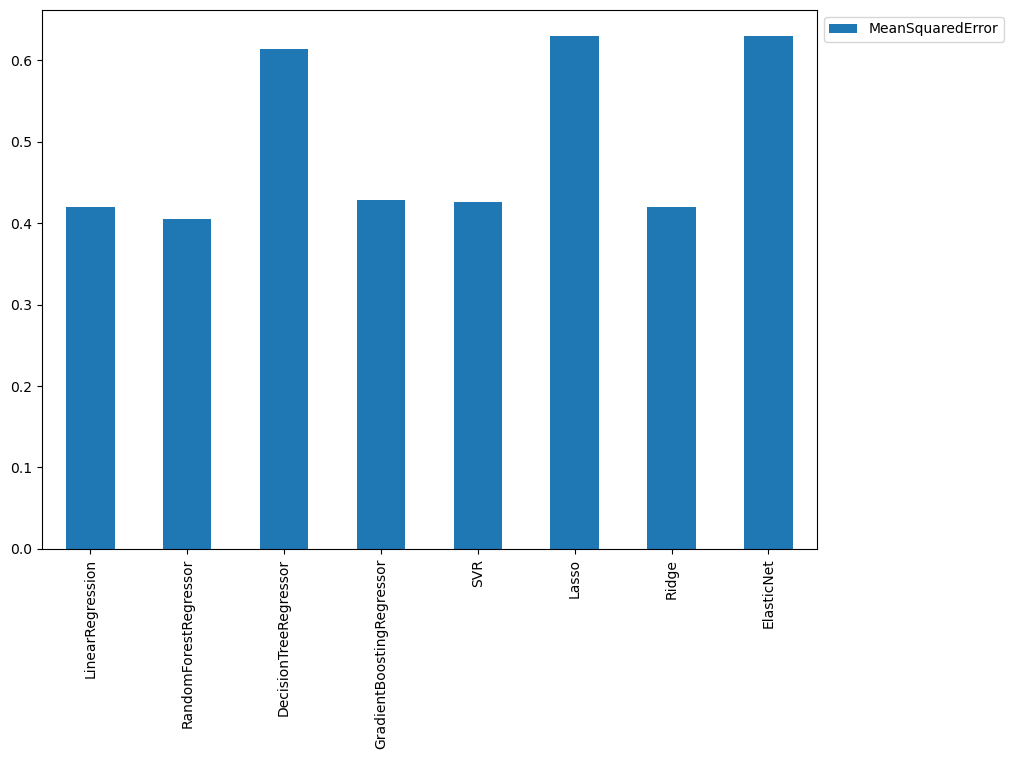

In [26]:
final_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));